# Project. Financial Analysis on Twitter

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

### Description

In [ ]:
full_name = 'Hadi Hadavi'
student_id = '99100263'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1 Exploratory Data Analysis

In [15]:
# Loading Datasets

data_folder = './data/'

# Read "companies.csv" into a DataFrame
companies_df = pd.read_csv(data_folder + 'companies.csv')

# Read "entities.csv" into a DataFrame
entities_df = pd.read_csv(data_folder + 'entities.csv')

# Read "training.1600000.processed.noemoticon.csv" into a DataFrame
training_df = pd.read_csv(data_folder + 'training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1")

# Read "tweets.csv" into a DataFrame
tweets_df = pd.read_csv(data_folder + 'tweets.csv')

# Read "users.csv" into a DataFrame, skipping lines with different numbers of fields
users_df = pd.read_csv(data_folder + "users.csv", on_bad_lines='skip')

# Previewing
print("Companies: \n",companies_df.head())
print("Entities: \n",entities_df.head())
print("Trainings: \n",training_df.head())
print("Tweets: \n",tweets_df.head())

C:\Users\Hadi\AppData\Local\Temp\ipykernel_13016\3557551580.py:18: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  users_df = pd.read_csv(data_folder + "users.csv", on_bad_lines='skip')


Companies: 
   ticker                  name exchange  capitalization
0      A  Agilent Technologies     NYSE    1.915000e+10
1     AA            Alcoa Corp     NYSE    6.480000e+09
2   AAAG  AAA Century Group US  OTCMKTS    9.480000e+06
3  AAAIF  ALTERNATIVE INV TR N  OTCMKTS    7.840000e+06
4  AAALF    AAREAL BANK AG NPV  OTCMKTS    1.720000e+09
Entities: 
              tweet_id entity_type  \
0  865191269030612992         url   
1  865191269030612992      symbol   
2  865191271899570176         url   
3  865191271899570176     hashtag   
4  865191271899570176     hashtag   

                                                text  
0  http://ih.advfn.com/p.php?pid=nmona&article=74...  
1                                               AMGN  
2  https://finance.yahoo.com/news/amgen-submits-b...  
3                                                FDA  
4                                            biotech  
Trainings: 
    0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_ 

In [17]:
print("Tweets: \n",tweets_df.head())
print("Users: \n",users_df.head())

Tweets: 
                    id                                               text  \
0  865326129644797957  RT @cruzfloresiv: To all the weak hands who so...   
1  865326133008642049  Investors Eye Fed, But Bond ETFs Still Add Ass...   
2  865326134262681600  Sell $NLNK (Ne❑wLink Genetics Corporation) tha...   
3  865326134917050368  Increase: $VCO $NTES $BPT $ENIC $QIWI $JP $STX...   
4  865326135952855040  Former #FDA commissioner Califf joins Verily, ...   

              user_id  in_reply_to_status_id  in_reply_to_user_id  \
0  859451814940336128                      0                    0   
1            44060322                      0                    0   
2  713570637306986496                      0                    0   
3  823239593151655936                      0                    0   
4            44367489                      0                    0   

   retweeted_status_id  retweeted_user_id lang  \
0   865323140531896320         3005609114   en   
1                 

### Overall statistics about the dataset

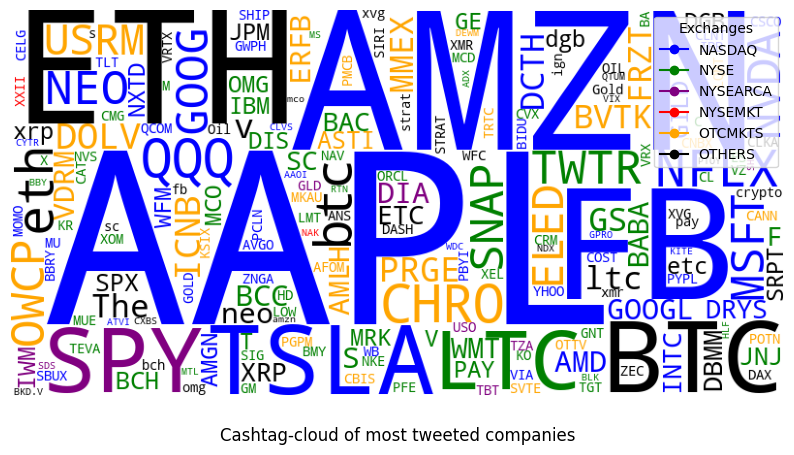

In [21]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Step 1: Read entities dataset and filter rows
entities_df = pd.read_csv(data_folder + "entities.csv")
filtered_entities_df = entities_df[entities_df['entity_type'] == 'symbol']

# Step 2: Create a dictionary from the filtered data
symbol_count_dict = filtered_entities_df['text'].value_counts().to_dict()

# Step 3: Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(symbol_count_dict)

# Step 4: Read companies dataset
companies_df = pd.read_csv(data_folder + "companies.csv")

# Step 5: Assign unique colors to exchanges
exchange_colors = {
    "NASDAQ": 'blue',
    "NYSE": 'green',
    "NYSEARCA": 'purple',
    "NYSEMKT": 'red',
    "OTCMKTS": 'orange',
    "OTHERS": 'black'  # Assign 'black' for "OTHERS" or missing values
}

# Step 6: Match symbols to companies and assign colors
def assign_color(ticker):
    exchange = companies_df.loc[companies_df['ticker'] == ticker, 'exchange'].values
    if len(exchange) > 0:
        exchange = exchange[0]
        return exchange_colors.get(exchange, exchange_colors["OTHERS"])
    return exchange_colors["OTHERS"]  # Assign 'black' for missing values

# Assign colors to symbols
symbol_colors = {symbol: assign_color(symbol) for symbol in symbol_count_dict.keys()}

# Step 7: Plot the word cloud with assigned colors
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud.recolor(color_func=lambda word, font_size, position, orientation, **kwargs: symbol_colors.get(word, 'red')))
plt.axis('off')

# Step 8: Create a color legend
legend_elements = [Line2D([0], [0], marker='o', color=color, label=exchange) for exchange, color in exchange_colors.items()]
plt.legend(handles=legend_elements, title='Exchanges', loc='upper right')

# Step 9: Add a title beneath the plot
plt.text(0.5, -0.1, "Cashtag-cloud of most tweeted companies", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

# Show the plot
plt.show()

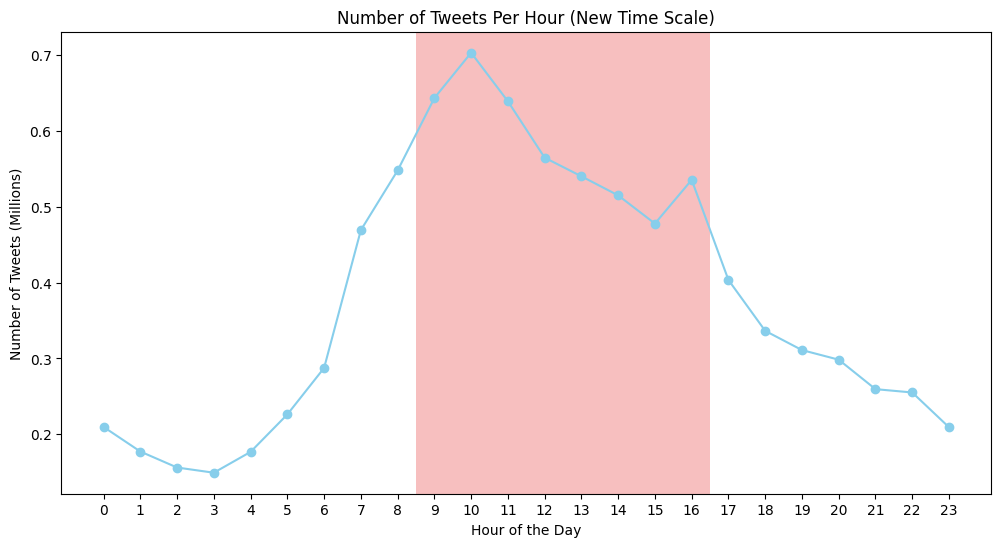

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from pytz import timezone

# Step 1: Read the tweets dataset
tweets_df = pd.read_csv(data_folder + "tweets.csv")

# Step 2: Convert the "created_at" column to datetime with a specified format
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'], format='%a %b %d %H:%M:%S %z %Y')

# Step 3: Change the time zone to a new one (e.g., 'US/Central')
tweets_df['created_at'] = tweets_df['created_at'].dt.tz_convert('US/Central')

# Step 4: Adjust time
tweets_df['created_at_adjusted'] = (tweets_df['created_at'].dt.hour + 1) % 24

# Step 5: Create a plot of the number of tweets per hour
tweets_per_hour = tweets_df['created_at_adjusted'].value_counts().sort_index()

# Step 6: Identify peak hours and highlight the background (9 am to 16 pm)
peak_hours = tweets_per_hour.loc[9:16].idxmax()

plt.figure(figsize=(12, 6))

# Divide y-labels by 1 million
tweets_per_hour = tweets_per_hour / 1000000

# Plot the line chart
tweets_per_hour.plot(kind='line', marker='o', color='skyblue')

# Highlight background for the specified peak hours (9 am to 4 pm)
plt.axvspan(9 - 0.5, 16 + 0.5, facecolor='lightcoral', alpha=0.5)

plt.title('Number of Tweets Per Hour (New Time Scale)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets (Millions)')
plt.xticks(range(24))
plt.show()
